In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import scipy as sp
from scipy import io
from sklearn.svm import SVC

In [ ]:
#plots accuracy, returns None
def plot_accuracy(x, y, name):
    plt.plot(x, y)
    plt.xlabel('num_samples')
    plt.ylabel('accuracy')
    plt.title(name)
    plt.show()

In [12]:
# returns list of valid_errors from each experiment; plots accuracy
def train_svm(samples, clf, train_set, train_y, valid_set, valid_y, name):
    train_error = list()
    valid_error = list()
    for sample_size in samples:
        clf.fit(train_set[:sample_size], train_y[:sample_size])
        print("sample_size: " + str(sample_size))
        train_error.append(clf.score(train_set, train_y))
        print("train_error: " + str(train_error))
        valid_error.append(clf.score(valid_set, valid_y))
        print("valid_error: " + str(valid_error))
    plot_accuracy(samples, train_error, name + ' Training_Accuracy')
    plot_accuracy(samples, valid_error, name + ' Validation_Accuracy')
    return valid_error

In [5]:
# returns dictionary with variable names as keys and matrix as values
mnist_dict = io.loadmat('mnist/train.mat')

In [15]:
#Splits data set into training and validation set of given size
def split_train_and_valid_sets(data, size):
    np.random.shuffle(data)
    shape = data.shape[0] 
    valid_set = data[:size, :-1] 
    valid_y = data[:size, -1] 
    train_set = data[size:, :-1] 
    train_y = data[size:, -1]
    return shape, valid_set, valid_y, train_set, train_y

In [6]:
# ***********************PROBLEM 1 --> VALIDATION SETS***********************
# -----------MNIST SET--------
# # get the matrix
# mnist_trainX = mnist_dict['trainX']
# np.random.shuffle(mnist_trainX)
# num_points_mnist = mnist_trainX.shape[0] 
# mnist_valid_set = mnist_trainX[:10000, :-1] 
# mnist_valid_y = mnist_trainX[:10000, -1] 
# mnist_train_set = mnist_trainX[10000:, :-1] 
# mnist_train_y = mnist_trainX[10000:, -1]

In [ ]:
# -----------MNIST SET--------
mnist_trainX = mnist_dict['trainX']
shape, mnist_valid_set, mnist_valid_y, mnist_train_set, mnist_train_y = split_train_and_valid_sets(mnist_trainX, 10000)

In [ ]:
# ---------------CIFAR-10 SET----------------
# cifar_dict = sp.io.loadmat('cifar/train.mat')
# cifar_trainX = cifar_dict['trainX']
# np.random.shuffle(cifar_trainX)
# cifar_valid_set = cifar_trainX[:5000, :-1] 
# cifar_valid_y = cifar_trainX[:5000, -1] 
# cifar_train_set = cifar_trainX[5000:, :-1] 
# cifar_train_y = cifar_trainX[5000:, -1]

(5000,)
(5000, 3072)
(45000,)
(45000, 3072)
[0 1 2 3 4 5 6 7 8 9]


In [ ]:
# ---------------CIFAR-10 SET----------------
cifar_dict = sp.io.loadmat('cifar/train.mat')
cifar_trainX = cifar_dict['trainX']
cifar_shape, cifar_valid_set, cifar_valid_y, cifar_train_set, cifar_train_y = split_train_and_valid_sets(cifar_trainX, 5000)

In [8]:
# --------------SPAM DataSet----------------
# spam_dict = sp.io.loadmat('spam/spam_data.mat')
# spam_trainX = spam_dict['training_data']
# np.random.shuffle(spam_trainX)
# spam_valid_set = spam_trainX[:1034, :-1] 
# spam_valid_y = spam_trainX[:1034, -1] 
# spam_train_set = spam_trainX[1034:, :-1] 
# spam_train_y = spam_trainX[1034:, -1]

In [40]:
# --------------SPAM DataSet----------------
spam_dict = sp.io.loadmat('spam/spam_data.mat')
data_set= spam_dict['training_data']
data_labels = spam_dict['training_labels']
print(data_set.shape, data_labels.T.shape)
merged_data_and_labels = np.hstack((data_set, data_labels.T))
np.random.shuffle(merged_data_and_labels)
spam_shape, spam_valid_set, spam_valid_y, spam_train_set, spam_train_y = split_train_and_valid_sets(merged_data_and_labels, 1034)

(5172, 32) (5172, 1)


In [8]:
# *********************PROBLEM 2 --> TRAIN DATA ***********************

# ----------TRAIN MNIST DATA------------#
clf_mnist = SVC()
experiments = [100, 200, 500, 1000, 2000, 5000, 10000]
# expect between 70-90% accuracy
train_svm(experiments, clf_mnist, mnist_train_set, mnist_train_y, mnist_valid_set, mnist_valid_y,
          'MNIST')

In [ ]:
# -----------TRAIN CIFAR DATA-----------#

clf_cifar = SVC(kernel='linear')
experiments = [100, 200, 500, 1000, 2000, 5000]
# expect between 25-35% accuracy
train_svm(experiments, clf_cifar, cifar_train_set, cifar_train_y, cifar_valid_set, cifar_valid_y, 'CIFAR')

Training SPAM



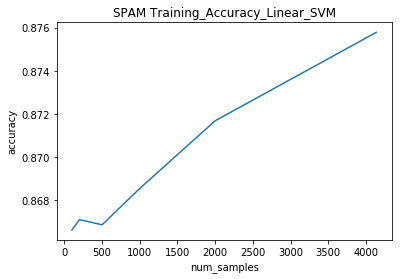

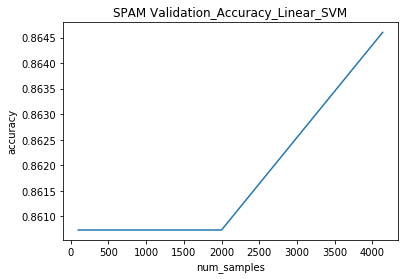

In [10]:
# ----------TRAIN SPAM DATA -------------
clf_spam = SVC()
experiments = [100, 200, 500, 1000, 2000, 4137]
# expect between 70-90% accuracy
train_svm(experiments, clf_spam, spam_train_set, spam_train_y, spam_valid_set, spam_valid_y, 'SPAM')

In [ ]:
# ************************** PROBLEM 3: BEST C Value ********************************
from sklearn.svm import SVC
C_range = np.logspace(-5, 1, num=4)
experiments = [10000]
for C in C_range:
    clf_mnist = SVC(C=C)
    train_svm(experiments, clf_mnist, mnist_train_set, mnist_train_y, mnist_valid_set, mnist_valid_y, 'MNIST)')


In [41]:
# ************************** PROBLEM 4: K-FOLD ********************************
def k_fold_split(data, clf, k, name):
    np.random.shuffle(data)
    valid_errors = list()
    copy_data = data[:, :]
    for i in range(k):
        if is_divisible_by_k(copy_data, k):
            k_arrays = np.split(copy_data, k)
        else:
            extra_data, divisible_data = preprocess_data(data, k)
            k_arrays = np.split(divisible_data, k)
            k_arrays[-1].hstack(extra_data, axis=0) #check axis
        valid_set = k_arrays[i]
        valid_data = valid_set[:, :-1]
        valid_y = valid_set[:, -1]
        train_set = np.hstack(k_arrays.pop(i), axis=0)
        train_data = train_set[:, :-1]
        train_y = train_set[:, -1]
        valid_errors.append(train_svm([train_data.shape], clf, train_data, train_y, valid_data, valid_y, name))
    valid_score = [sum(score[0])/k for score in valid_errors]
    print("Valid Score is:")
    print(valid_score)
    return valid_score

In [42]:
def preprocess_data(data, k):
    remainder = data.shape % k
    extra_samples = data[-remainder, :]
    divisible_samples = data[:-remainder, :]
    return divisible_samples, extra_samples

In [43]:
def is_divisible_by_k(data, k):
    if data.shape % k == 0:
        return True
    return False

In [44]:
clf_spam = SVC()
spam_training = np.hstack((spam_train_set, spam_train_y.T))
print(spam_train_set.shape, spam_train_y.T.shape)
k_fold_split(spam_training, clf_spam, 5, 'SPAM')

ValueError: all the input arrays must have same number of dimensions

In [ ]:
# ****************** PROBLEM 5: KAGGLE COMPETITION ***************
# from sklearn import svm
# #create four classifers
# #in the constructor for the svc you need to make sure it's a binary classifier
# clf1 = svm.SVC()
# clf2 = svm.SVC()
# clf3 = svm.SVC()
# clf4 = svm.SVC()
# 
# #add extra models to increase the hamming distance, get more room for errors
# 
# #fit the data X to the labels yi where yi = {0,1}
# #binary classifer
# #this comes after you build y1, y2, y3, y4
# clf1.fit(X, y1)
# clf2.fit(X, y2)
# clf3.fit(X, y3)
# clf4.fit(X, y4)
#